# CAC 1
  
**Name: Sneha Gupta <br>
RegNo: 21112341 <br>
Class: 4BScEA** 
****

### **Objective:** <br>
The objective of this project is to web scrape Amazon dataset of TV and predict if the price of a T.V. is expensive or not based on other features.

### **Problem Definition:** <br>
1) Identify any domain with a problem which can be addressed using Prediction Techniques. <br>
2) Create a Dataset for classification using web scraping or google forms. <br>
3) Ensure your dataset has all possible combination of feature where data preprocessing techniques can be applied (Data Cleaning, Dimensionality Reduction, Data Transformation, Feature Engineering) <br>
4) Apply all the categories of classification algorithm (KNN, Logistic Regression, Decision Tree, Random Forest, SVM, Naïve Bayes) along with hyper parameter tuning. <br>
5) Use the ROC curve to determine the best algorithm for your dataset.

### **Methodology:** <br>
* Web scrape Amazon dataset
* Apply data pre processing techniques like Extracting numerical values from columns, Imputation, One Hot Encoding, Outliers Detection and removing outliers, Binning, Feature Split and Scaling.
* Apply PCA
* Apply Feature Selection techniques like Chi Square, Recursive Feature elimination and random forest importance.
* Apply all the classification algorithms like KNN, Logistic Regression, Decision Tree, Random Forest, SVM, Naïve Bayes along with hyper parameter tuning.
* Plot ROC Curves

### **Result:** <br>
* KNN is displaying the highest AUC score which suggests that KNN is the best algorithm for this dataset.
* KNN gave the highest accuracy
* Accuracy with Logistic Regression is 66.6%. It increased to 78% after hyperparameter tuning. The AUC score is 64%.
* Accuracy with Random Forest is 66.6%. It increased to 87.7% after hyperparameter tuning. The AUC score is 78%
* Accuracy with KNN is 83%. It decreased to 60% after hyperparameter tuning. The AUC score is 65%.
* Accuracy with Decision tree is 74.5%. It remained same after hyperparameter tuning. The AUC score is 50%.
* Accuracy with Naive Bayes is 66.6%. It increased to 77.8% after hyperparameter tuning. The AUC score is 75%.
* Accuracy with SVM is 74.5%. It increased to 77.8% after hyperparameter tuning. The AUC score is 75%.
* All the methods of feature selection like chi sqare almost gave similar features to predict price

### **Learnings:** <br>
* I learned how to apply different classifocation algorithms.
* I learned how to apply pre processing techniques.
* I learned how to apply feature selection techniques.

| Question Number | Status |
| --- | --- |
| 1 | Completed |
| 2 | Completed |
| 3 | Completed |
| 4 | Completed |
| 5 | Completed |

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as Models
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC  
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy import cov
from numpy.linalg import eig
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

In [2]:
df1 = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\clean_df_1.csv",index_col=False)

In [5]:
df1.head(2)

,title,price,ratings,availability,brand,discount,tech,res,refresh,size,ratingsNo,price_bins,discount_bins,ratingsNo_bins,Depth,Width,Height
0,Kodak 139 cm (55 inches) 4K Ultra HD Smart Cer...,29999.0,4.4,0,0,45.0,1,0.393851,0.295867,55,597.0,"(23500, 33500]","(40, 60]","(0, 2000]",29.0,124.0,78.0
1,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,39999.0,4.2,0,0,20.0,1,0.393851,0.295867,55,8532.0,"(33500, 43500]","(19, 40]","(8000, 10000]",24.6,135.0,77.1


In [4]:
df1['brand'] = pd.get_dummies(df1['brand'] )

In [5]:
total = sum(df1['price'])
count = len(df1['price'])
average = total / count
average

31857.263817288123

In [6]:
df1['price'] = ['expensive' if x > 32000 else 'not expensive' for x in df1['price']]

In [7]:
df1['price'] = pd.get_dummies(df1['price'] )

In [8]:
X = df1.drop(['price','price_bins','discount_bins','ratingsNo_bins','title'],axis=1)
y = df1['price']

### `PCA`

In [9]:
# Compute the covariance matrix
covariance_matrix = cov(X.T)

In [10]:
# Compute the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = eig(covariance_matrix)

In [11]:
# Sort the eigenvalues in descending order and the corresponding eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

In [12]:
# Select the number of principal components
n_components = 1

# Project the data onto the principal components
X_pca = X.dot(eigenvectors[:,:n_components])

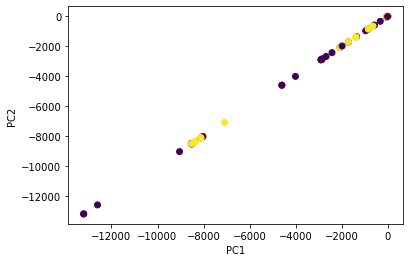

In [13]:
# Plot the results
import matplotlib.pyplot as plt
plt.scatter(X_pca, X_pca, c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### `Feature Selection`

In [14]:
from sklearn.feature_selection import SelectKBest,f_classif,chi2

### Chi Square

In [15]:
model1 = SelectKBest(chi2,k=8)

In [16]:
new = model1.fit(X,y)

In [17]:
X_new = new.transform(X)

In [18]:
df2 = new.get_support(indices = True)

In [19]:
df2_ = X.iloc[:,df2]

In [20]:
df2_.head()

,availability,brand,discount,size,ratingsNo,Depth,Width,Height
0,0,0,45.0,55,597.0,29.0,124.0,78.0
1,0,0,20.0,55,8532.0,24.6,135.0,77.1
2,0,0,44.0,32,69.0,8.3,71.6,42.4
3,0,1,32.0,40,8521.0,8.5,90.4,51.6
4,0,0,39.0,50,8364.0,7.7,112.7,66.2


### Recursive Feature Elimination

In [21]:
estimator = LinearRegression()

In [22]:
selector = RFE(estimator, n_features_to_select=8, step=1)

In [23]:
selector = selector.fit(X, y)
selected_features = X.columns[selector.support_]
selected_features

Index(['ratings', 'availability', 'brand', 'discount', 'tech', 'res',
       'refresh', 'size'],
      dtype='object')

In [24]:
df3 = selector.get_support(indices = True)

In [25]:
df3_ = X.iloc[:,df3]

In [26]:
df3_.head()

,ratings,availability,brand,discount,tech,res,refresh,size
0,4.4,0,0,45.0,1,0.393851,0.295867,55
1,4.2,0,0,20.0,1,0.393851,0.295867,55
2,4.0,0,0,44.0,1,0.393851,0.295867,32
3,4.4,0,1,32.0,1,0.393851,0.295867,40
4,4.7,0,0,39.0,1,0.393851,0.295867,50


### Random forest importance 

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [28]:
print(rf.feature_importances_)

[0.10503647 0.01058979 0.00974527 0.10409351 0.00167851 0.
 0.00368744 0.21546922 0.11573677 0.10124839 0.13924077 0.19347386]


In [29]:
# Get the feature importances and associated feature names
importances = rf.feature_importances_
feature_names=X.columns

In [30]:
# Create a pandas DataFrame of feature importances
importance_df = pd.DataFrame({"feature_names": feature_names, "importances": importances})

In [31]:
# Sort the DataFrame by feature importances in descending order
importance_df = importance_df.sort_values("importances",ascending = False)

In [32]:
importance_df

,feature_names,importances
7,size,0.215469
11,Height,0.193474
10,Width,0.139241
8,ratingsNo,0.115737
0,ratings,0.105036
3,discount,0.104094
9,Depth,0.101248
1,availability,0.010590
2,brand,0.009745
6,refresh,0.003687


In [33]:
df4_=df1[['size','Height','Width','ratingsNo','ratings','discount','Depth','availability']]

#### Extracting best features out of all the methods

In [34]:
df5_ = df1[['availability','size','Depth','brand','Width','Height','ratings','ratingsNo']]

### Model Training and Testing

In [35]:
X = df5_
y = df1['price']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

### `Classification Algorithms`

### 1) Logistic regression

In [37]:
X_train.shape

(41, 8)

In [38]:
model=LogisticRegression()

In [39]:
model.fit(X_train,y_train)

LogisticRegression()

In [40]:
model.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [97]:
accuracy1 = model.score(X_test,y_test)
accuracy1

0.6666666666666666

#### Hyperparameter tuning

In [42]:
lgreg1=LogisticRegression(multi_class='ovr',solver='liblinear')

In [43]:
parameters = {'penalty':['l1','l2'],'C':[1,2.0,3.0,4.0,5.0],'max_iter':[100,200,300,400,500,600]}

In [44]:
from sklearn.model_selection import GridSearchCV
grid_class1=GridSearchCV(lgreg1,param_grid=parameters,scoring='accuracy',cv=5)

In [45]:
grid_class1.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr',
                                          solver='liblinear'),
             param_grid={'C': [1, 2.0, 3.0, 4.0, 5.0],
                         'max_iter': [100, 200, 300, 400, 500, 600],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

## Best hypertuned parameters

In [125]:
print("Best Parameters of Logistic regression:", grid_class1.best_params_)

Best Parameters of Logistic regression: {'C': 1, 'max_iter': 100, 'penalty': 'l1'}


In [121]:
print("Best Score of Logistic regression:",grid_class1.best_score_)

Best Score: 0.7805555555555556


#### Evaluation metrics

In [48]:
grid_predictions1 = model.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions1))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.60      0.43      0.50         7

    accuracy                           0.67        18
   macro avg       0.65      0.62      0.62        18
weighted avg       0.66      0.67      0.65        18



### AUC Curve

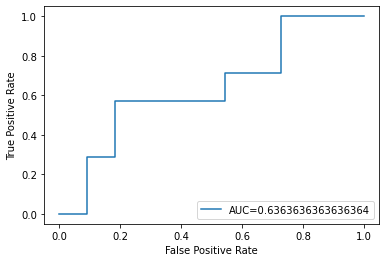

In [49]:
#define metrics
y_pred_proba = grid_class1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### 2) Random Forest

In [50]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [101]:
accuracy2 = accuracy_score(y_test, y_pred)
accuracy2

0.6666666666666666

### Hyper parameter tuning

In [52]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [53]:
grid_search = GridSearchCV(classifier,
                           param_grid = param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_leaf_nodes=6, n_estimators=50,
                       random_state=0)


## Best hypertuned parameters


In [129]:
print("Best Score of Random Forest:",grid_search.best_score_)

Best Parameters of Random Forest: 0.8777777777777779


In [130]:
print("Best Parameters of Random Forest:",grid_search.best_params_)

Best Parameters of Random Forest: {'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 50}


#### Evaluation metrics

In [56]:
grid_predictions2 = grid_search.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions2))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.60      0.43      0.50         7

    accuracy                           0.67        18
   macro avg       0.65      0.62      0.62        18
weighted avg       0.66      0.67      0.65        18



### AUC Curve

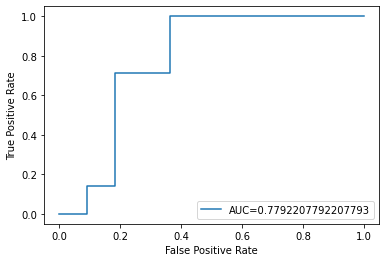

In [57]:
#define metrics
y_pred_proba = grid_search.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### 3) KNN

In [58]:
knn = KNeighborsClassifier(n_neighbors = 2 , p = 2)

In [59]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=2)

In [110]:
accuracy3 = knn.score(X,y)
accuracy3

0.8305084745762712

### Hyper parameter tuning

In [61]:
grid_params = { 'n_neighbors' : [2,4,6,8,10,12]}

In [62]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params,cv=11)

In [63]:
g_res = gs.fit(X_train, y_train)

## Best hypertuned parameters


In [133]:
print("Best Score of KNN:",g_res.best_score_)

Best Score of KNN: 0.5833333333333333


In [135]:
print("Best parameters of Random Forest:",g_res.best_params_)

Best parameters of Random Forest: {'n_neighbors': 8}


#### Evaluation metrics

In [66]:
grid_predictions3 = g_res.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions3))

              precision    recall  f1-score   support

           0       0.75      0.55      0.63        11
           1       0.50      0.71      0.59         7

    accuracy                           0.61        18
   macro avg       0.62      0.63      0.61        18
weighted avg       0.65      0.61      0.61        18



### AUC Curve

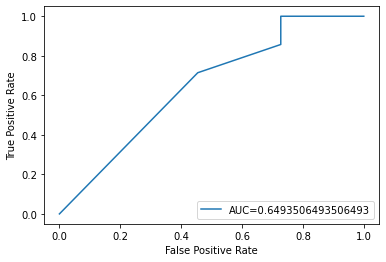

In [67]:
#define metrics
y_pred_proba = g_res.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### 4) Decision tree

In [68]:
# Create decison tree classifier object
clf = Models(criterion = 'entropy')

# Train decision tree classifier
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# by default, decision tree classifier uses gini index

In [115]:
accuracy4 = clf.score(X,y)
accuracy4

0.7457627118644068

[Text(0.45454545454545453, 0.9166666666666666, 'x[5] <= 68.0\nentropy = 0.996\nsamples = 41\nvalue = [22, 19]'),
 Text(0.2727272727272727, 0.75, 'x[7] <= 803.0\nentropy = 0.65\nsamples = 24\nvalue = [20, 4]'),
 Text(0.18181818181818182, 0.5833333333333334, 'x[6] <= 4.05\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(0.09090909090909091, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.4166666666666667, 'x[5] <= 52.55\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.18181818181818182, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.36363636363636365, 0.25, 'x[5] <= 59.95\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2727272727272727, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.45454545454545453, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36363636363636365, 0.5833333333333334, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.63636363

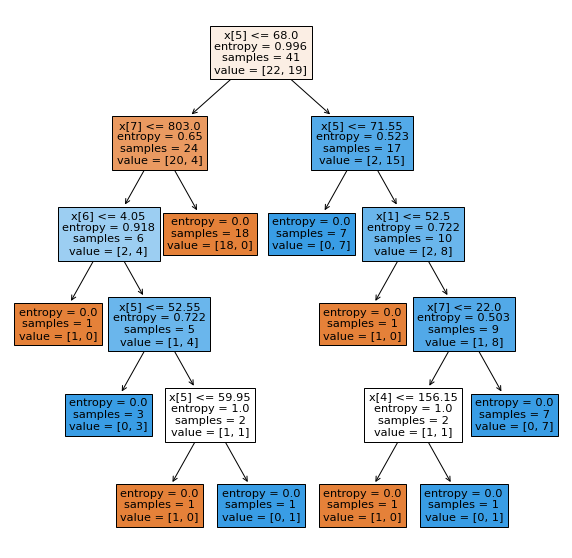

In [70]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True)

### Hyper parameter tuning

In [71]:
tuned_hyper_model= Models(max_depth=4,max_features='auto',max_leaf_nodes=2,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='random')

In [72]:
tuned_hyper_model.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_depth=4, max_features='auto', max_leaf_nodes=2,
                       min_samples_leaf=2, min_weight_fraction_leaf=0.1,
                       splitter='random')

In [73]:
tuned_pred=tuned_hyper_model.predict(X_test)
tuned_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=uint8)

## Best hypertuned parameters


In [138]:
print("Best Score of KNN:",tuned_hyper_model.score(X,y))

Best Score of KNN: 0.559322033898305


#### Evaluation metrics

In [75]:
grid_predictions4 = tuned_hyper_model.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions4))

              precision    recall  f1-score   support

           0       0.43      0.27      0.33        11
           1       0.27      0.43      0.33         7

    accuracy                           0.33        18
   macro avg       0.35      0.35      0.33        18
weighted avg       0.37      0.33      0.33        18



### AUC Curve

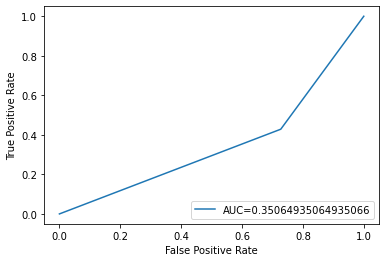

In [76]:
#define metrics
y_pred_proba = tuned_hyper_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### 5) Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [79]:
y_pred = gnb.predict(X_test)

In [106]:
accuracy5 = gnb.score(X_test,y_test)
accuracy5

0.6666666666666666

### Hyper parameter tuning

In [81]:
param_grid = {'var_smoothing':[1e-9,1e-8,1e-7,1e-6,1e-5]}

In [82]:
grid_search1 = GridSearchCV(gnb,param_grid,cv=5)

In [83]:
grid_search1.fit(X,y)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]})

## Best hypertuned parameters


In [139]:
print("Best Hyperparameters of naive bayes:", grid_search1.best_params_)
print("Best Score of naive bayes:", grid_search1.best_score_)

Best Hyperparameters of naive bayes: {'var_smoothing': 1e-07}
Best Score of naive bayes: 0.7787878787878787


#### Evaluation metrics

In [85]:
grid_predictions5 = grid_search1.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions5))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.67      0.57      0.62         7

    accuracy                           0.72        18
   macro avg       0.71      0.69      0.70        18
weighted avg       0.72      0.72      0.72        18



### AUC Curve

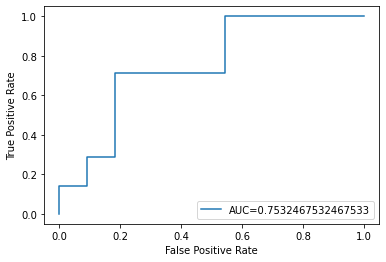

In [86]:
#define metrics
y_pred_proba = grid_search1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### 6) SVM

In [87]:
clf1 = SVC(kernel='linear',probability=True,) 
  
# fitting x samples and y classes 
clf1.fit(X, y)

SVC(kernel='linear', probability=True)

In [107]:
accuracy6 = clf1.score(X,y)
accuracy6

0.7457627118644068

### Hyper parameter tuning

In [89]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(),param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.556 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

## Best hypertuned parameters


In [140]:
# print best parameter after tuning
print("Best parameters of SVM:",grid.best_params_)

Best parameters of SVM: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [141]:
print("Best Score of SVM:",grid.best_score_)

Best Score of SVM: 0.5361111111111111


#### Evaluation metrics

In [92]:
grid_predictions6 = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions6))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        11
           1       0.00      0.00      0.00         7

    accuracy                           0.61        18
   macro avg       0.31      0.50      0.38        18
weighted avg       0.37      0.61      0.46        18



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### AUC Curve

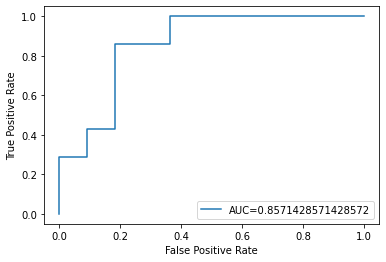

In [93]:
#define metrics
y_pred_proba = clf1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [94]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        11
           1       0.00      0.00      0.00         7

    accuracy                           0.61        18
   macro avg       0.31      0.50      0.38        18
weighted avg       0.37      0.61      0.46        18



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<br>

## Accuracy of all the algorithms

In [119]:
print("Logistic Regression Classifier Accuracy:", accuracy1 )
print("Random Forest Classifier Accuracy:", accuracy2 )
print("KNN Classifier Accuracy:", accuracy3 )
print("Decision Tree Classifier Accuracy:", accuracy4 )
print("Naive Bayes Classifier Accuracy:", accuracy5 )
print("SVM Classifier Accuracy:", accuracy6 )

Logistic Regression Classifier Accuracy: 0.6666666666666666
Random Forest Classifier Accuracy: 0.6666666666666666
KNN Classifier Accuracy: 0.8305084745762712
Decision Tree Classifier Accuracy: 0.7457627118644068
Naive Bayes Classifier Accuracy: 0.6666666666666666
SVM Classifier Accuracy: 0.7457627118644068


Observation : KNN gave the highest accuracy

## ROC of all the algorithms

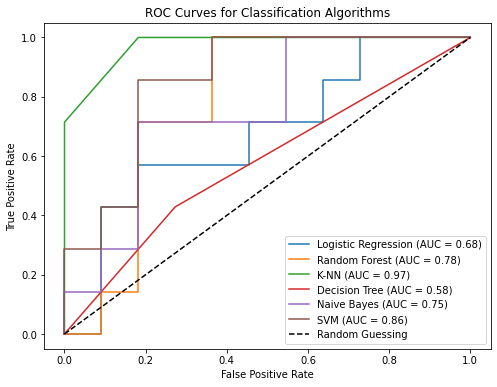

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate ROC/AUC curves for each classifier
classifiers = [model, classifier, knn, clf, grid_search1, clf1]
classifier_names = ['Logistic Regression','Random Forest','K-NN', 'Decision Tree','Naive Bayes','SVM']

plt.figure(figsize=(8, 6))

for i, clf in enumerate(classifiers):
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(classifier_names[i], roc_auc))
    

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Algorithms')
plt.legend(loc='lower right')
plt.show()

Observation: KNN is displaying the highest AUC score which suggests that KNN is the best algorithm for this dataset.